#CS620 Data Project - Predictive Modeling of Heart Disease

---

## Contact Information


###-Rupa Mishra
>*  Email: rmish001@odu.edu
>*  Portfolio: https://rupa42.github.io/


# Abstract



---
This project will focus on analyzing 13 key indicators of heart disease in order to predict the occurence of heart disease in patients. The data set from UC Irvine Machine Learning Repository, linked below, consists of data from multiple locations; Cleveland, Hungary, Switzerland and Long Beach Veterans Affairs clinic. The Cleveland data set has been previously studied using machine learning techniques and includes information on the occurence, or lack thereof, of heart disease in each patient. The aim of this project will be to use the Cleveland data set to build a predictive model that can be extended to the remaining three data sets in order to discern which patients are likely to experience heart disease.

UC Irvine Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease (1)

## Project Plan
- Create visually appealing and informative representations of heart disease data, including prevalence rates, risk factors, and demographic patterns.
-Use visualizations to highlight and communicate the major risk factors associated with heart disease, such as high blood pressure, high cholesterol, and exercise induced angina.
- Illustrate the correlation between lifestyle choices and cardiovascular health through engaging graphics and charts.


### 1. Data Collection and Preprocessing
  - Download the dataset from the UC Irvine Machine Learning Repository.
  -  Import the data into Google Colab utilizing Python.
  -  Identify and handle missing values in the dataset.

### 2. Data Cleaning and Preprocessing
-  Handle outliers in the dataset.
-  Convert data types as necessary for further analysis.
-  Perform any additional data cleaning tasks as needed.

### 3. Data Analysis
-  Conduct exploratory data analysis to comprehend the data distribution.
-  Discover correlations between different indicators.
-  Identify major risk factors associated with heart disease.

### 4. Data Visualization
-  Generate visualizations of prevalence rates.
-  Create demographic patterns visualizations.
-  Use visualizations to underscore and convey the major risk factors associated with heart disease.

### 5. Model Building and Evaluation
-  Choose suitable machine learning algorithms for constructing the predictive model.
-  Train the model using the Cleveland dataset.
-  Fine-tune hyperparameters of the model.





# Goals for February 20 Progress Check

---


>Data imported and cleaned for all four data sets

>Initial statisical analysis of Cleveland data

>* General analysis of data: how many men vs. women, age distrubtion, weight distribution, weight distribution by sex

>* Regression analysis of factors to determine correlation between risk factor presence and heart disease occurence

>* Initial visualization of data after determination of most relevant risk factors



# Data Cleaning
---

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Reading a CSV file from a URL and storing the data in a DataFrame
risk_factors = pd.read_csv('https://archive.ics.uci.edu/static/public/45/data.csv')

# Printing the count of non-NA cells for each column in the DataFrame
print(risk_factors.count())

HTTPError: HTTP Error 502: Bad Gateway

In [ ]:
# Display the first 5 rows of the risk_factors DataFrame
risk_factors.head()

NameError: name 'risk_factors' is not defined

In [ ]:
# Display the last 5 rows of the risk_factors DataFrame to check the end of the dataset
risk_factors.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


After importation, and before cleaning, the dataset holds at most 14 data points for 303 indidviduals. For user clarity we will elaborate on the data points currently present as well give a brief description of the medical terms.
* Column 1: 'Age' - current age of the patient
* Column 2: 'Sex' - 0 = female, 1 = male
* Column 3: 'cp' - refers to the type of chest pain present. Angina specifically refers to chest pain caused by reduced blood flow to the heart. Scores range from 1- 4

    * 1: Typical angina
    * 2: Atypical angina
    * 3: Non-anginal pain
    * 4: Asymptomatic
* Column 4: 'trestbps' - resting systolic blood pressure in mmHg, normal values are in the range of 120 mmHg with 130 mmHg being stage 1 high blood pressure
* Column 5: 'chol' - serum cholesterol in mg/dL, target range is less than 200 mg/dL
* Column 6: 'fbs' - fasting blood sugar level > 120 mg/dL, 1 = true, 0 = false. Normal fasting glucose levels are in the range of 70-100 mg/dL, levels above 120 mg/dL indicate possible presence of diabetes
* Column 7: 'restecg' - resting electrocariograph results, 0 = normal, 1 = abnormal
* Column 8: 'thalach' - maximum heart rate measured in beats per minute. Target maximum heart rate is calculated by subtracting the patients age from 220, a measured heart rate exceeding this maximum indicates high cardiac strain.
* Column 9: 'exang' - exercise induced angina, 0 = no, 1 = yes. Chest pain brought about by exercise is a common symptom of coronary artery disease.
* Column 10: 'oldpeak' - ST depression induced by exercise

    * The ST segment of an ECG represents the time between ventricular depolarization and repolarization. "Exercise induced ST segment depression is considered a reliable ECG finding for the diagnosis of obstructive coronary atherosclerosis."(2)
* Column 11: 'slope' - characterization of the measured peak exercise ST segment of patient ECG
    * 1: upsloping
    * 2: flat
    * 3: downsloping
* Column 12: 'ca' - number of major vessels, in the range of 0-3, colored by fluoroscopy
    * Fluoroscopy is a procedure utilizing continous X-ray imaging to track the flow of blood through coronary arteries to evaluate the presence of blockage. (3)
* Column 13: 'thal' - thalassemia is a blood disorder that results in less hemoglobin being present than normal (4). Score of 3 indicates normal, 6 indicates a defect, and 7 indicates a reversible defect.
* Column 14: 'num' - Diagnosis of heart disease. Scored from 0-4, with 0 indicating no diagnosis of blockage, and 1-4 ranging from moderate to severe blockage diagnosed.


# Initial Visualization
---

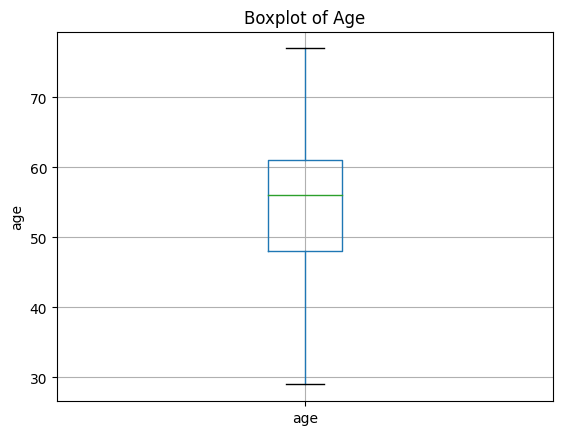

Chart 1: Age of study participants


In [ ]:
# Create a boxplot for the 'age' column in the risk_factors DataFrame
risk_factors.boxplot(column='age')

# Set the title of the plot
plt.title('Boxplot of Age')

# Set the label for the y-axis
plt.ylabel('age')

# Display the plot
plt.show()
print('Chart 1: Age of study participants')

In [ ]:
# Numeric columns where you want to handle outliers
numeric_cols = ['age', 'fbs', 'trestbps', 'chol', 'oldpeak']

#Function to remove outliers based on IQR
def remove_outliers(risk_factors, cols):
  Q1 = risk_factors[cols].quantile(0.25)
  Q3 = risk_factors[cols].quantile(0.75)
  IQR = Q3 - Q1
  return risk_factors[~((risk_factors[cols] < (Q1 - 1.5 * IQR)) | (risk_factors[cols] > Q3 + 1.5 * IQR)).any(axis=1)]

#Remove outliers from the dataframe
risk_factors_clean = remove_outliers(risk_factors, numeric_cols)

When we ran the outlier removal process on the specified columns (age, fbs, trestbps, chol, oldpeak),these columns contain numerical data that may have a wide range of values (Potential for extreme Values). Outliers in these columns can significantly impact statistical analysis and modeling results.The goal is to identify and remove data points that are significantly different from the rest of the data. This helps ensure that the analysis and modeling are not unduly influenced by extreme values, which can skew results and lead to unreliable conclusions.For each of the numeric columns, the function calculated the first quartile (Q1) and third quartile (Q3). The IQR is a measure of statistical dispersion and represents the range within which the middle 50% of the data lies.Any data point in the specified columns that was less than (Q1 - 1.5 * IQR) or greater than (Q3 + 1.5 * IQR) was considered an outlier. This resulted in a cleaned version of the DataFrame (risk_factors_clean) where the data was more consistent and less influenced by extreme values.

In [ ]:
# Display the cleaned DataFrame in a readable format
display(risk_factors_clean)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


Outlier data was determined by finding the inner quartile range and eliminating any data that was more than 1.5 times the inner quartile range below the first quartile (Q1) or above the third quartile (Q3). Other columns contain categorical data, binary data, or other types of data where the concept of an “outlier” as defined by the IQR method doesn’t apply.
 After removal of outliers the data field shrank from 303 patients to 245 patients with acceptable data. Overall, running this outlier removal process on the specified columns helped improve the quality of our data by eliminating extreme values that could potentially distort analysis and modeling results.

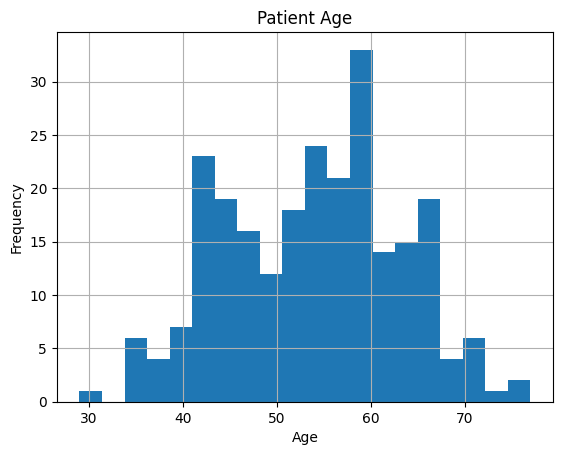

Chart 2: Patient Age Distribution
The patients age's range from 77 to 29
The average patient age is: 54



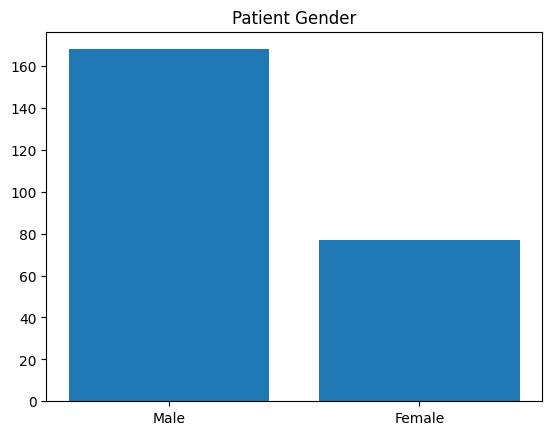

Chart 3: Patient Gender
This study consists of 168  males, and 77 females.


In [ ]:
# Create a histogram of the 'age' column in the cleaned DataFrame with 20 bins
risk_factors_clean['age'].hist(bins = 20)

# Set the title, x-axis, and y-axis of the plot
plt.title('Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Display chart information
print('Chart 2: Patient Age Distribution')
print('The patients age\'s range from', risk_factors['age'].max(), 'to', risk_factors['age'].min())
print('The average patient age is:', int(risk_factors['age'].mean()))
print()

# Calculate the occurrence of each gender in the 'sex' column of the cleaned DataFrame
gender_occurence = risk_factors_clean['sex'].value_counts()

# Define the x-values for the bar plot
xvalues = np.arange(0,2,1)

# Define the labels for the x-values
gender = ['Male', 'Female']

# Create a bar plot of the gender occurrence, set the x-value labels and title, and display it
plt.bar(xvalues, gender_occurence)
plt.xticks(xvalues, gender)
plt.title('Patient Gender')
plt.show()

# Display chart information
print('Chart 3: Patient Gender')
print('This study consists of', gender_occurence[1], ' males, and', gender_occurence[0], 'females.')


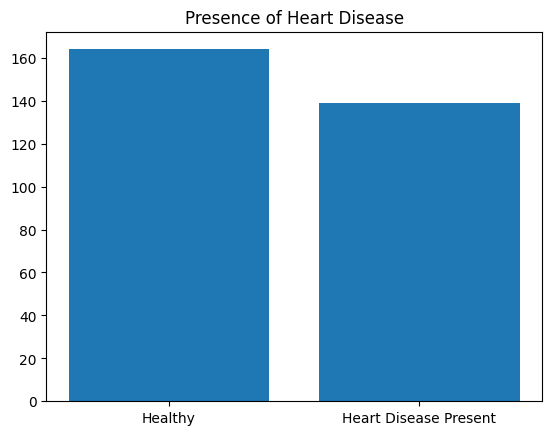

Chart 4: Presence of Heart Disease
This study will be confined to attempting to predict the presence or
absence of heart disease and will make no attempt to distinguish between
various severity of heart disease. Due to this all patients with any diagnosis
of heart disease were combined into one group, yielding one group of healthy
patients, and one group of patients experiencing heart disease. This dataset
which will be used for model training, testing and selection consits of 164
healthy patients and 139 patients diagnosed with CHD. 


In [ ]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
risk_factors_clean = risk_factors.copy()

# Function to determine if disease is present based on a condition
def disease_present(x):
    return 1 if x > 0 else 0

# Apply the function to the 'num' column of the DataFrame converting all non-zero values to 1, and all zero values will remain as 0
# risk_factors_clean['num'] = risk_factors_clean['num'].apply(disease_present)
risk_factors_clean.loc[:, 'num'] = risk_factors_clean['num'].apply(disease_present)

# Calculate the occurrence of each value in the 'num' column of the cleaned DataFrame
disease = risk_factors_clean['num'].value_counts()

# Define the x-values, labels, title, and display the created plot
xvalues = np.arange(0,2,1)
diagnosis = ['Healthy', 'Heart Disease Present']
plt.bar(xvalues, disease)
plt.xticks(xvalues, diagnosis)
plt.title('Presence of Heart Disease')
plt.show()

# Display plot information and scope of this study
print('Chart 4: Presence of Heart Disease')
print('''This study will be confined to attempting to predict the presence or
absence of heart disease and will make no attempt to distinguish between
various severity of heart disease. Due to this all patients with any diagnosis
of heart disease were combined into one group, yielding one group of healthy
patients, and one group of patients experiencing heart disease. This dataset
which will be used for model training, testing and selection consits of 164
healthy patients and 139 patients diagnosed with CHD. ''')

# Feature Correlation
---

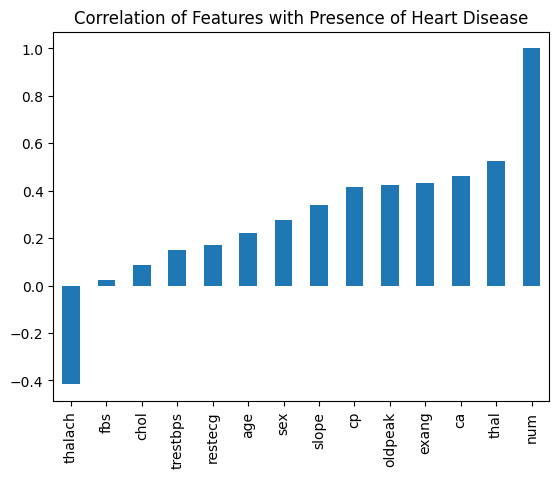

Chart 5: Risk factors correlation to presence of heart disease
The plot visualizes the correlation between each feature in the dataset
and the presence of heart disease (represented by the ‘num’ column). Each bar
in the plot represents a different feature. The height of each bar indicates
the strength and direction of the correlation: bars extending upward show a
positive correlation, while bars extending downward show a negative correlation.
Most importantly, it displays which features are most strongly associated with
the presence of heart disease, and can guide the feature selection process when
building a predictive model. 


In [ ]:
# Calculate the correlation between each feature and the target variable ('num')
# Calculate and sort the pairwise correlations of all features with 'num' using the corr() function
correlations = risk_factors_clean.corr()['num'].sort_values()

# Create a bar plot of the correlation values
# The bar plot visualizes the correlation of each feature with 'num'
correlations.plot(kind='bar')

# Display the plot
plt.title('Correlation of Features with Presence of Heart Disease')
plt.show()

# Display plot information and scope of this study
print('Chart 5: Risk factors correlation to presence of heart disease')
print('''The plot visualizes the correlation between each feature in the dataset
and the presence of heart disease (represented by the ‘num’ column). Each bar
in the plot represents a different feature. The height of each bar indicates
the strength and direction of the correlation: bars extending upward show a
positive correlation, while bars extending downward show a negative correlation.
Most importantly, it displays which features are most strongly associated with
the presence of heart disease, and can guide the feature selection process when
building a predictive model. ''')

# Project Progress Check I
---
Project Proposal: This project aims to predict heart disease occurrence in patients by analyzing 13 key indicators using the UC Irvine Machine Learning Repository’s data set. The data, collected from Cleveland, Hungary, Switzerland, and Long Beach Veterans Affairs clinic, will be used to build a predictive model. Initially, the model will be built using the extensively studied Cleveland data set, and then extended to the remaining locations. The ultimate goal is to identify patients likely to experience heart disease.

* Target Audience - Medical professionals and insurance companies who would gain value from being able to leverage predictive modeling of the presence of heart disease.
* Tools/Technologies - The early data analysis was done with Python utilizing Numpy and Pandas. Now that we have information on how the various data points correlate to heart disease, we can begin to train a machine learn model on the data and tune what our input parameters are. Because this dataset includes the diagnosis of the patient, we have a readily available way to track the progress of the models accuracy by comparing the predictions to the known diagnosis.

* Overall Design - This data analysis and predictive modeling project focuses on heart disease prediction. It starts with data cleaning and preprocessing, where outliers are identified and handled. The cleaned data is then visualized to understand the distribution of various features such as age and gender. Initial design also involves calculating and visualizing the correlation of each feature with the target variable, which is the presence of heart disease. This step is crucial in understanding which features will be important for the predictive model. The ultimate goal is to be build a predictive model that can discern which patients are likely to experience heart disease based on their risk factors. The project design so far utilizes exploratory data analysis, and feature selection.

* Core Features/User Expectations - At the completion of the project, we aim to provide an accurate, user friendly model that will be able to take in patient data and make a determination if the patient is likely to have heart disease of some kind. Clearly this model alone will not suffice as a diagnostic tool, however it could be used to predict future needs that a patient may have as a result of heart disease allowing doctors to plan ahead. Additionally, patients can benefit from this by getting an idea of where their health may be headed if they don't make lifestyle changes. Finally, insurance companies could benefit from a model such as this because it would allow a forward looking way to project future claims likelihood.

* Current Status/What's Left - At this point the training data set has been cleaned, basic visualization has been done, and the degree to which each data field is correlated with heart disease has been determined. Moving forward we will begin to train a model on our data and fine tune the model parameters to get it running well on our data. Once we have a well tuned model we have 3 additional datastets that we will use our model to analyze. Since all datasets consists of roughly similar size and patient information we would expect the model to yield similiar predicitions on the other datasets. If we see large differences in the frequency of disease prediciton from dataset to dataset, we will continue to tune model parameters.







# Correlation of Features
---
Following the comprehensive visualization of the feature space and its correlation with heart disease, our subsequent analytical goal was to isolate and scrutinize the features demonstrating the most significant correlation. This will involve a detailed examination of each of the features, with an emphasis on their individual correlation with the manifestation of heart disease.

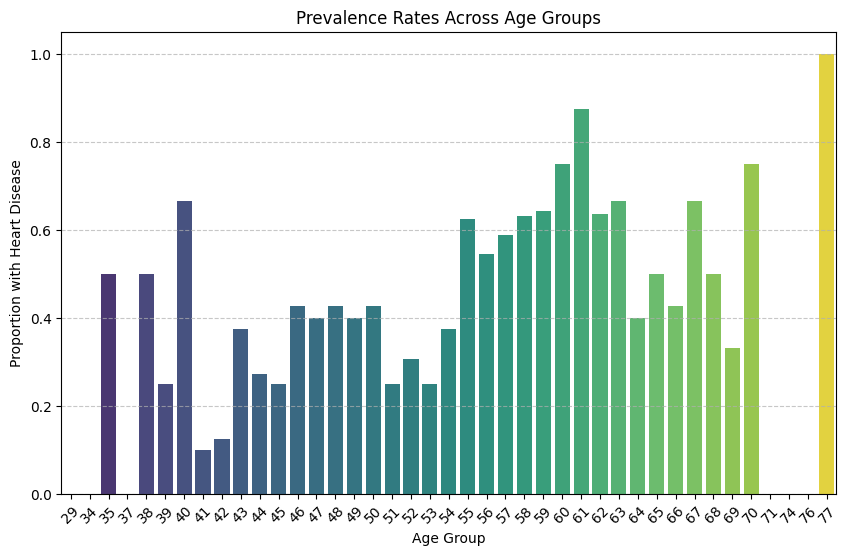

Chart 6: Prevelance of heart disease across all ages in the study.

The correlation coefficient between age and proportion with heart disease is 0.343.


In [ ]:
# Group data by age groups and calculate prevalence rates
age_group_prevalence = risk_factors_clean.groupby('age')['num'].mean().reset_index()

# Sort data by prevalence rates
age_group_prevalence = age_group_prevalence.sort_values(by='num', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='num', hue='age', data=age_group_prevalence, palette='viridis', legend=False)
plt.title('Prevalence Rates Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion with Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print('Chart 6: Prevelance of heart disease across all ages in the study.')

# Calculate the correlation coefficient
age_correlation_coefficient = np.corrcoef(age_group_prevalence['age'], age_group_prevalence['num'])[0, 1]
print(f"\nThe correlation coefficient between age and proportion with heart disease is {age_correlation_coefficient:.3f}.")

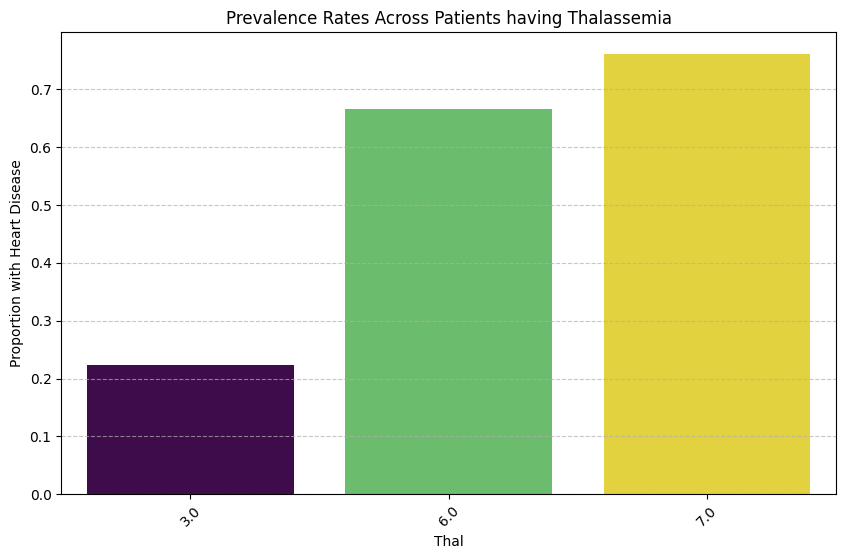


This study consists of prevalence occurrence,'thal'- thalassemia is a blood disorder that results in less hemoglobin being present than normal indicates a reversible defect.

The correlation coefficient between thal and proportion with heart disease is 0.997


In [ ]:
# Group data by thal groups and calculate prevalence rates
age_group_prevalence = risk_factors_clean.groupby('thal')['num'].mean().reset_index()

# Sort data by prevalence rates
age_group_prevalence = age_group_prevalence.sort_values(by='num', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='thal', y='num', hue='thal', data=age_group_prevalence, palette='viridis', legend=False)
plt.title('Prevalence Rates Across Patients having Thalassemia')
plt.xlabel('Thal')
plt.ylabel('Proportion with Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display plot information and scope of this study
print ('''\nThis study consists of prevalence occurrence,'thal'- thalassemia is a blood disorder that results in less hemoglobin being present than normal indicates a reversible defect.''')

# Calculate the correlation coefficient
thal_correlation_coefficient = np.corrcoef(age_group_prevalence['thal'], age_group_prevalence['num'])[0, 1]
print(f"\nThe correlation coefficient between thal and proportion with heart disease is {thal_correlation_coefficient:.3f}")

    ca       num
0  0.0  0.261364
1  1.0  0.676923
2  2.0  0.815789
3  3.0  0.850000


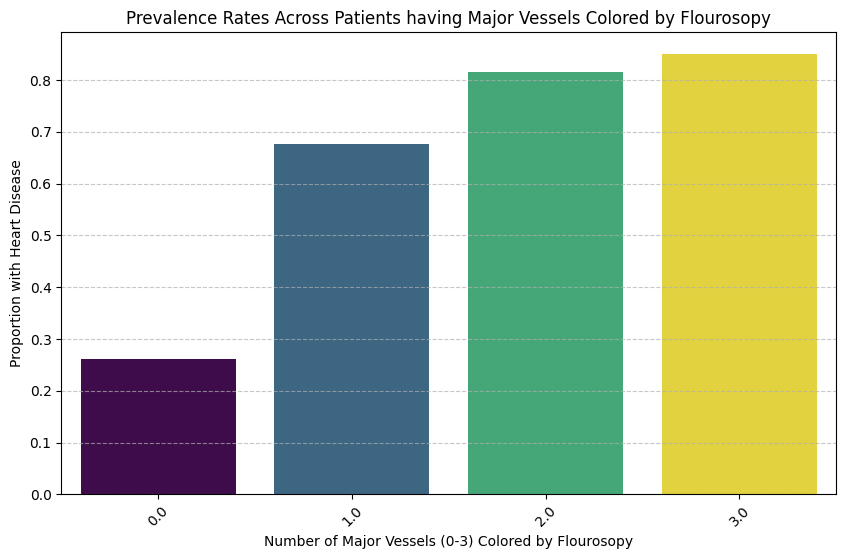


This study consists of prevalence occurrence, 'ca' - number of major vessels (0-3) colored by flourosopy and how this correlates to heart disease.
There appears to be a positive correlation. 

The correlation coefficient between ca and proportion with heart disease is 0.910


In [ ]:
# Group data by 'ca' groups and calculate prevalence rates
ca_group_prevalence = risk_factors_clean.groupby('ca')['num'].mean().reset_index()
print(ca_group_prevalence)
# Sort data by prevalence rates
ca_group_prevalence = ca_group_prevalence.sort_values(by='num', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='ca', y='num', hue='ca', data=ca_group_prevalence, palette='viridis', legend=False)
plt.title('Prevalence Rates Across Patients having Major Vessels Colored by Flourosopy')
plt.xlabel('Number of Major Vessels (0-3) Colored by Flourosopy')
plt.ylabel('Proportion with Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display plot information and scope of this study
print ('''\nThis study consists of prevalence occurrence, 'ca' - number of major vessels (0-3) colored by flourosopy and how this correlates to heart disease.
There appears to be a positive correlation. ''')

# Calculate the correlation coefficient
ca_correlation_coefficient = np.corrcoef(ca_group_prevalence['ca'], ca_group_prevalence['num'])[0, 1]
print(f"\nThe correlation coefficient between ca and proportion with heart disease is {ca_correlation_coefficient:.3f}")

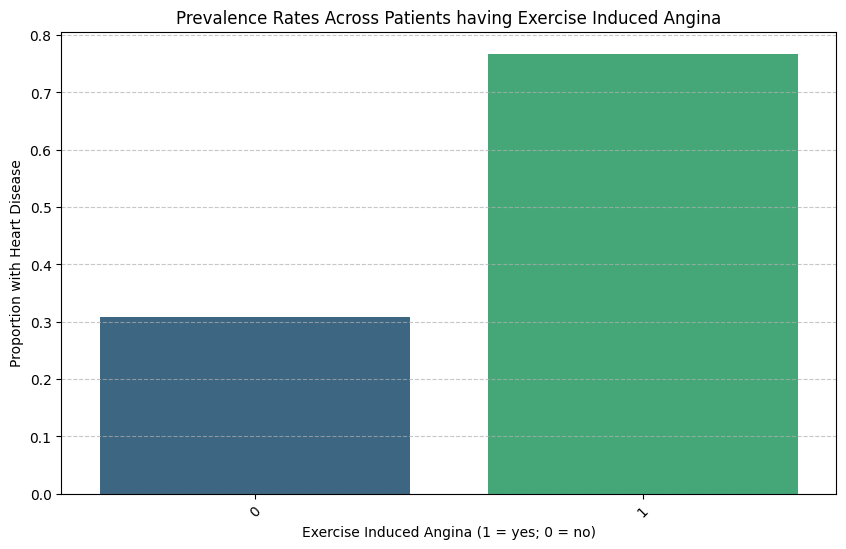

This study consists of prevalence occurrence, 'exang' - exercise induced angina (1 = yes; 0 = no).

The correlation coefficient between exang and proportion with heart disease is 1.000


In [ ]:
# Group data by 'exang' groups and calculate prevalence rates
exang_group_prevalence = risk_factors_clean.groupby('exang')['num'].mean().reset_index()

# Sort data by prevalence rates
exang_group_prevalence = exang_group_prevalence.sort_values(by='num', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='exang', y='num', hue='exang', data=exang_group_prevalence, palette='viridis', legend=False)
plt.title('Prevalence Rates Across Patients having Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina (1 = yes; 0 = no)')
plt.ylabel('Proportion with Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display plot information and scope of this study
print ('''This study consists of prevalence occurrence, 'exang' - exercise induced angina (1 = yes; 0 = no).''')

# Calculate the correlation coefficient
exang_correlation_coefficient = np.corrcoef(exang_group_prevalence['exang'], exang_group_prevalence['num'])[0, 1]
print(f"\nThe correlation coefficient between exang and proportion with heart disease is {exang_correlation_coefficient:.3f}")

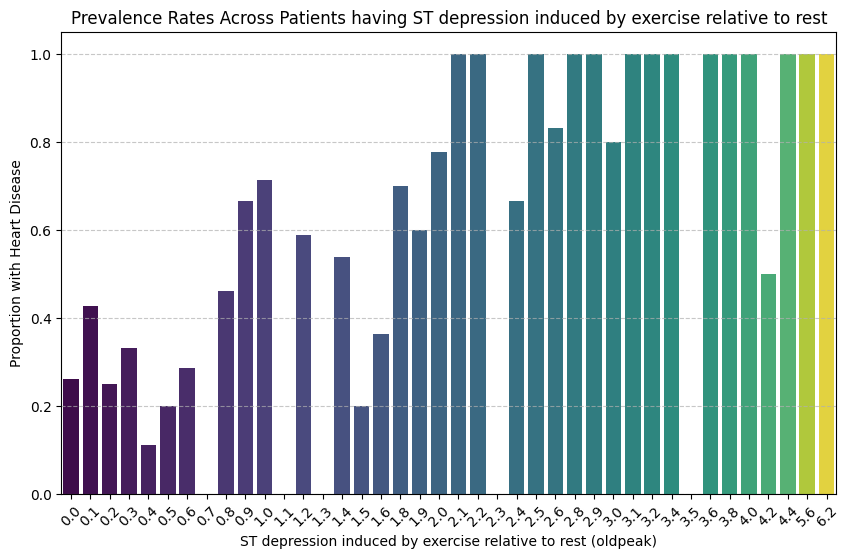


This study consists of prevalence occurrence, 'oldpeak' - ST depression induced by exercise relative to rest.

The correlation coefficient between oldpeak and proportion with heart disease is 0.633


In [ ]:
# Group data by 'oldpeak' groups and calculate prevalence rates
oldpeak_group_prevalence = risk_factors_clean.groupby('oldpeak')['num'].mean().reset_index()

# Sort data by prevalence rates
oldpeak_group_prevalence = oldpeak_group_prevalence.sort_values(by='num', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='oldpeak', y='num', hue='oldpeak', data=oldpeak_group_prevalence, palette='viridis', legend=False)
plt.title('Prevalence Rates Across Patients having ST depression induced by exercise relative to rest')
plt.xlabel('ST depression induced by exercise relative to rest (oldpeak)')
plt.ylabel('Proportion with Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display plot information and scope of this study
print ('''\nThis study consists of prevalence occurrence, 'oldpeak' - ST depression induced by exercise relative to rest.''')

# Calculate the correlation coefficient
oldpeak_correlation_coefficient = np.corrcoef(oldpeak_group_prevalence['oldpeak'], oldpeak_group_prevalence['num'])[0, 1]
print(f"\nThe correlation coefficient between oldpeak and proportion with heart disease is {oldpeak_correlation_coefficient:.3f}")

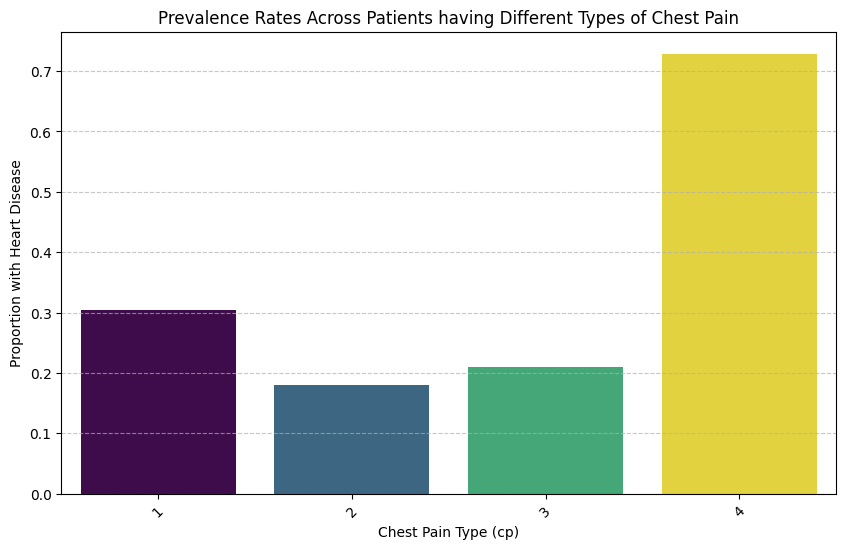


This study consists of prevalence occurrence, 'cp' - chest pain type:
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

The correlation coefficient between cp and proportion with heart disease is 0.661


In [ ]:
# Group data by 'cp' groups and calculate prevalence rates
cp_group_prevalence = risk_factors_clean.groupby('cp')['num'].mean().reset_index()

# Sort data by prevalence rates
cp_group_prevalence = cp_group_prevalence.sort_values(by='num', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='cp', y='num', hue='cp', data=cp_group_prevalence, palette='viridis', legend=False)
plt.title('Prevalence Rates Across Patients having Different Types of Chest Pain')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Proportion with Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display plot information and scope of this study
print ('''\nThis study consists of prevalence occurrence, 'cp' - chest pain type:
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic''')

# Calculate the correlation coefficient
cp_correlation_coefficient = np.corrcoef(cp_group_prevalence['cp'], cp_group_prevalence['num'])[0, 1]
print(f"\nThe correlation coefficient between cp and proportion with heart disease is {cp_correlation_coefficient:.3f}")


In [ ]:
print("The top most correlated features with heart diease are thal, ca, exang oldpeak, and cp.")
print("With the previous graphs and calculations.  The correlation coefficients for each feature and the presence of heart disease are as follows: \n")

print(f"exang:    {exang_correlation_coefficient:.3f}")
print(f"thal:     {thal_correlation_coefficient:.3f}")
print(f"ca:       {ca_correlation_coefficient:.3f}")
print(f"cp:       {cp_correlation_coefficient:.3f}")
print(f"oldpeak:  {oldpeak_correlation_coefficient:.3f}")
print(f"Age:      {age_correlation_coefficient:.3f}")

# If any or all of these are highly correlated then only one needs to be included in model.
# The rest will be included 'by proxy' leaving room to add a different indicator as a model factor.

The top most correlated features with heart diease are thal, ca, exang oldpeak, and cp.  We also wanted to include age.
With the previous graphs and calculations.  The correlation coefficients for each feature and the presence of heart disease are as follows: 

exang:    1.000
thal:     0.997
ca:       0.910
cp:       0.661
oldpeak:  0.633
Age:      0.343


In [ ]:
#Examine correlation between all factors
corrs = risk_factors_clean.corr()

#Correlation coefficient greater than 0.6 is considered strong correlation
#Correlation coefficient in the range of 0.4-0.6 is considered moderate
moderate_corr = corrs.apply(lambda x: x > 0.4)

print(moderate_corr)
print()
print('''Table 1: A matrix comparison of risk factors correlation with all other
risk factors in the study. A coefficient of correlation in the range of 0.4-0.6
indicates a moderate degree of correlation and is denoted in the table using
a True/False notation. ''')
print()


strong_corr = corrs.apply(lambda x: x >0.6)
print(strong_corr)
print()
print('''Table 2: A matrix comparison of risk factors correlation with all other
risk factors in the study. A coefficient of correlation above 0.6 indiciates a
strong positive correlation and is denoted in the table using a True/False
notation. It should be noted that the only values that show strong correlation
are along the diagonal of the table where the factors are compared to themselves.''')

print(moderate_corr['num'])
print(corrs['num'])

NameError: name 'risk_factors_clean' is not defined

Correlation values in the range of 0.6 and higher indiciate a high degree of correlation between the compared data. From the strong correlation table it is shown that none of the risk factors exhibit a strong correlation to any of the others, the only 'True' values in the table are along the diagonal where the factor is being compared to itself.

From the moderate correlation table the factors: cp (chest pain), exang (exercise induced angina), oldpeak (ST depression brought on by exercise), ca (flouroscopy) and thal (thalassemia) are shown to have moderate correlation to a diagnosis of CHD. None of these features exhibit a high degree of correlation to one another, this indicates that each feature is a contributing factor to CHD that acts relativley independantly of all other features. As a result all five features may be included in the predictive model in order to yield the clearest understanding of the relationship between feature and diagnosis.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corrs, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the heatmap
plt.show()


NameError: name 'corrs' is not defined

<Figure size 1000x800 with 0 Axes>

# Project Progress Check II
---
Project Proposal: This project aims to predict heart disease occurrence in patients by analyzing 13 key indicators using the UC Irvine Machine Learning Repository's data set. The data, collected from Cleveland, Hungary, Switzerland, and Long Beach Veterans Affairs clinic, will be used to build a predictive model. Initially, the model will be built using the extensively studied Cleveland data set, and then extended to the remaining locations. The ultimate goal is to identify patients likely to experience heart disease.

- Project Continuation: Since the first progress check, we have continued our work on predicting heart disease occurrence in patients. We have further analyzed the data and started implementing a predictive model. To reiterate, the target audience is medical professionals and insurance companies who would gain value from being able to leverage preditictive modeling of the presence of heart disease.

- Tools/Technologies: We have continued to use Python, leveraging libraries such as Numpy, Pandas, and Scikit-learn. We have implemented a logistic regression model to predict the presence of heart disease based on selected features.

- Data Visualization: We have created several plots to visualize the prevalence rates across different patient groups. These plots have helped us understand the distribution of heart disease across different age groups, genders, and other factors.

- Model Development: We have selected the features 'cp', 'exang', 'oldpeak, 'ca', and 'thal' as predictors for our logistic regression model based on their correlation with the target variable. We have split the data into training and testing sets, trained our model on the training data, and evaluated its performance on the testing data.

- Current Status: At this point, we have a working logistic regression model that can predict the presence of heart disease based on selected features. We have evaluated the model's performance and are in the process of fine-tuning it to improve its recall, as we aim to minimize false negatives due to their high cost.

- What's Left: Moving forward, we plan to continue refining our model to improve its performance. We will also consider implementing other models and comparing their performance to our logistic regression model. Once we are satisfied with our model's performance on the Cleveland dataset, we will extend it to the remaining locations. We will also continue to visualize our data to gain further insights and guide our model development process. In the end, we will draw conclusions and make real work inferences. Lastly, we will document future work, problems encountered, and areas that could be improved enabling someone to continue down this line of exploration.


Multiple models will be evaluated and compared in order to find the most optimal model. Since this model is designed to provide advance information on the likelihood of CHD in a patient, it will be designed to prioritize capturing the maximum fraction of positive diagnosis from the total group at the expense of an increase in false positives. The cost of a false positive is essentially negligible as further testing can easily be done to confirm, or repudiate, the models diagnosis. However, a false negative can have much higher cost resulting from delay in treatment, increased odds of future hospital stay and chronic illness. Due to the high cost of miscategorizing a patient with CHD the model will be tuned to maximize data recall over precision.

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        56
           1       0.78      0.74      0.76        43

    accuracy                           0.80        99
   macro avg       0.80      0.79      0.79        99
weighted avg       0.80      0.80      0.80        99



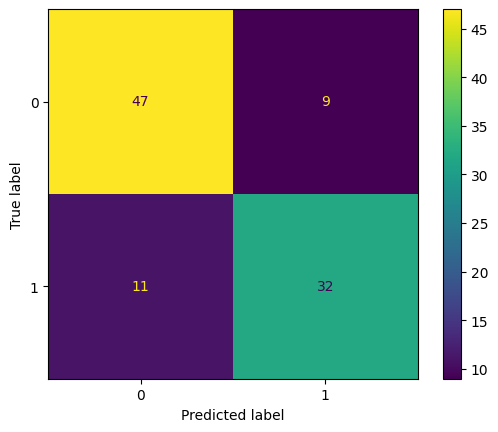

Chart #####: Shows the confusion matrix for a logistic regression model,
using only one training pass through the data and using one third of the data as
a test set.


In [ ]:
#Deep copy of risk factor df so that it can be manipulated without earlier calculations
df = risk_factors_clean.copy(deep=True)
df = df.dropna(axis=0, how='any')
x = df[['cp','exang','oldpeak','ca','thal']]
y = df[['num']]


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

logreg = LogisticRegression()
logreg.fit(x_train, y_train.values.ravel())

y_prediction = logreg.predict(x_test)

print(classification_report(y_test, y_prediction))

logreg_cm = confusion_matrix(y_test, y_prediction, labels=logreg.classes_)
display_logreg_cm = ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=logreg.classes_)
display_logreg_cm.plot()
plt.show()
print('''Chart #####: Shows the confusion matrix for a logistic regression model,
using only one training pass through the data and using one third of the data as
a test set.''')

Shown above, Chart ### shows initial behavior of a very simple model using no cross validation techniques and only one pass through the training data. The accuracy of this model is, 80%, meaning that 80% of the time the model accurately classified the patient as CHD positive or negative. As previously discussed however, due to the negligible cost of a false positive, and the exceedingly high cost of a false negative, the overall accuracy is of secondary importance relative to the recall of the CHD positive group. For patients who are positively diagnosed with CHD this model has a recall score of 0.74, indicating that 26% of the patients from the test data set who have CHD are incorrectly classified as being negative for CHD. This rate of failure is unacceptably high therefore further analysis will be done to attempt to make the model fit better. In order to optimize the model the basic logistic regression model will be futher tuned using cross validation to attempt to reduce any variance in the model.



              precision    recall  f1-score   support

           0       0.78      0.82      0.80        56
           1       0.75      0.70      0.72        43

    accuracy                           0.77        99
   macro avg       0.76      0.76      0.76        99
weighted avg       0.77      0.77      0.77        99



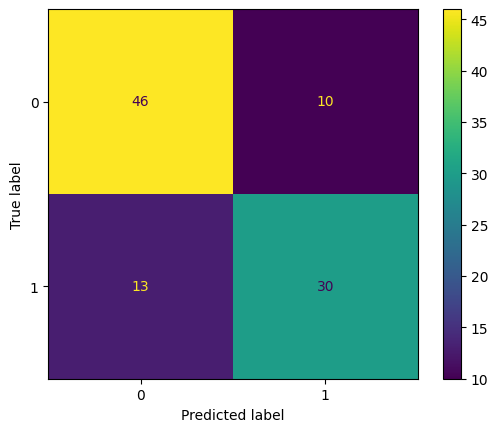

Chart #####: Results for logisitic regression using 10 fold cross
validation during model training. 


In [ ]:
#cross validation on logistic regression
from sklearn.linear_model import LogisticRegressionCV

#10 fold cross validation of logistic regression model
logreg_cv = LogisticRegressionCV(cv=10, random_state=1).fit(x_train, y_train.values.ravel())

y_predictions_cv = logreg_cv.predict(x_test)

print(classification_report(y_test, y_predictions_cv))

logreg_cv_cm = confusion_matrix(y_test, y_predictions_cv, labels=logreg_cv.classes_)
display_logreg_cv_cm = ConfusionMatrixDisplay(confusion_matrix = logreg_cv_cm,
                                              display_labels=logreg_cv.classes_)

display_logreg_cv_cm.plot()
plt.show()
print('''Chart #####: Results for logisitic regression using 10 fold cross
validation during model training. ''')

Chart ### indicates that after using 10-fold cross validation on the training data the model has decreased in it's accuracy as well as recall. The accuracy of the model after cross validation is now 76%, and for the CHD positive group the recall has fallen to 0.70 or 70%. Both of these values are lower than the model with no cross validation which had accuracy of 80% and recall for CHD positive patients of 74%.
<br>
<br>
The decrease in the model's diagnostic abilities likely indicate that using a single pass through the training data gave an inaccurate picture of the effectiveness of the model. With cross validation the model was trained multiple times in such a way that it's performance is more indicative of it's average performance, and therefore the decrease in model effectiveness can be thought of as regression towards the mean by going from one training session to many.
<br>
<br>
For the parameters selected from the complete dataset it has been shown that the maximum effectiveness of a logistic regression model is 70% for the CHD positive patients. In order to determine if further improvement can be made Support Vector Machine (SVM) alogrithms will now be analyzed to determine if better results can be achieved by using different kernel functions to model the data.

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        56
           1       0.78      0.72      0.75        43

    accuracy                           0.79        99
   macro avg       0.79      0.78      0.78        99
weighted avg       0.79      0.79      0.79        99



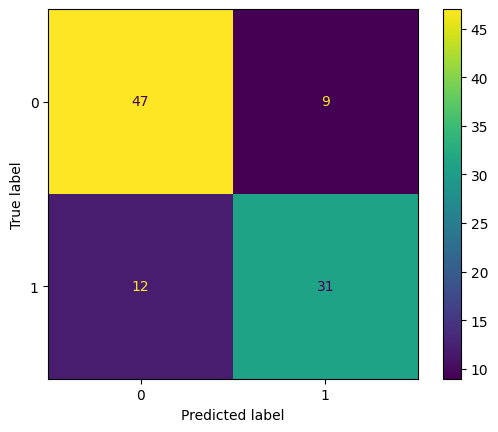

In [ ]:
#SVM model construction and training
#linear kernel function
from sklearn import svm

linear_svm = svm.SVC(kernel='linear', C=1, random_state=1).fit(x_train, y_train.values.ravel())


#apply model to test data
linear_svm_predictions = linear_svm.predict(x_test)

print(classification_report(y_test, linear_svm_predictions))
linear_svm_cm = confusion_matrix(y_test, linear_svm_predictions, labels=linear_svm.classes_)
display_linear_svm_cm = ConfusionMatrixDisplay(confusion_matrix = linear_svm_cm,
                                               display_labels = linear_svm.classes_)

display_linear_svm_cm.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        56
           1       0.78      0.72      0.75        43

    accuracy                           0.79        99
   macro avg       0.79      0.78      0.78        99
weighted avg       0.79      0.79      0.79        99



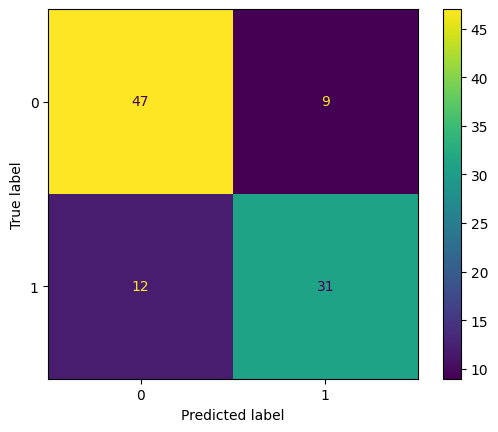

In [ ]:
#search through parameter grid to select ideal model based on recall score

from sklearn.model_selection import GridSearchCV
param_grid = [{'C':[1, 10, 100, 1000], 'kernel':['linear']},
              {'C':[1, 10, 100, 1000], 'gamma':[0.1, 0.001, 0.0001], 'kernel':['rbf']},
              {'C':[1, 10, 100, 1000], 'gamma':[0.1, 0.001, 0.0001], 'kernel':['poly']},
              {'C':[1, 10, 100, 1000], 'gamma':[0.1, 0.001, 0.0001], 'kernel':['sigmoid']},]

grid_search = GridSearchCV(svm.SVC(), param_grid= param_grid, cv=10, refit=True)
grid_search.fit(x_train, y_train.values.ravel())

#get best model
ideal_svm = grid_search.best_estimator_

#run model
ideal_svm_predictions = ideal_svm.predict(x_test)

print(classification_report(y_test, ideal_svm_predictions))

ideal_svm_cm = confusion_matrix(y_test, ideal_svm_predictions,
                                labels=ideal_svm.classes_)
display_ideal_svm_cm = ConfusionMatrixDisplay(confusion_matrix = ideal_svm_cm,
                                              display_labels = ideal_svm.classes_)

display_ideal_svm_cm.plot()
plt.show()

In [ ]:
#ideal model parameters
print(ideal_svm.get_params())

print(grid_search.best_score_)


{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.8486842105263157


From the ideal_svm parameters displayed it can be seen that the ideal state vector model uses a linear kernel to model the data, which explains why the initial simple SVM model that was built on a linear kernel has identical performance to the optimal one.<br> <br>

Overall the ideal SVM model found using grid search is superior to the logistic regression model. The SVM model's recall of CHD positive patients is 0.72, where the logisitic regression model has 0.70 CHD positive recall. In further analysis the ideal SVM model will be tested against the other three datasets present in the Heart Disease repository from UC Irvine in order to further evaluate the model on a larger amount of data. <br><br>

The two models that have so far been analyzed in this project have consisted of five features, this small number of features allows for the model to be computationally inexpensive to run, but has also resulted in the failure to properly classify 28% of the CHD positive patients in the study. In order to investigate if recall percentage can be increased, two models, one for each machine learning algorithm, will be trained using all 13 features from the dataframe. These models will be significantly more complex then the models that have so far been created and as such they will need to exhibit a marked increase in recall in order to make the increased complexity and computation time worth it. Finally, because these models will include all possible features, they should represent the theoretical maximum recall it is possible to achieve using this training data.

# Additional Analysis <br><br>

Below we will import, clean and analyze the three auxillary datasets from the Heart Disease repository.

In [ ]:
# Getting the other processed datasets
# (I hosted it on my google drive and then am using a public link because I couldn't find a way to directly get a url off archive.ics.uci.edu to each specific data set)
hungarian_df = pd.read_csv('https://drive.google.com/uc?id=11mECQaJWjGsNHIpQIdCjj6oAo4YKHMBk', header=None)
switzerland_df = pd.read_csv('https://drive.google.com/uc?id=1Lp0asgsgKHi3X_pfEUqgMomjhMyMr8je', header=None)
longbeach_df = pd.read_csv('https://drive.google.com/uc?id=1hf8ao_-8RTt8KS-mZmkXnsIwBtPc9l1r', header=None)

In [ ]:
#clean the datasets to include only rows with complete entries
#for the required features and the target column
print(hungarian_df.head())
print(hungarian_df.count())

#the columns are not named in the auxillary datasets
#from the initial description of the table the feature
#columns are at positions 2, 8, 9, 11, 12 when zero indexed
#and the target CHD diagnosis is column 13
#the models require that all entries in the dataframe to
#be analyzed are numeric
h_df = hungarian_df.copy(deep=True)
h_df = h_df[[2, 8, 9, 11, 12, 13]]
h_df = h_df.apply(pd.to_numeric, errors='coerce')
h_df = h_df.dropna(axis=0, how='any')

#after dropping all incomplete rows only 1 entry remains
print(h_df.count())

   0   1   2    3    4  5  6    7  8    9  10 11 12  13
0  28   1   2  130  132  0  2  185  0  0.0  ?  ?  ?   0
1  29   1   2  120  243  0  0  160  0  0.0  ?  ?  ?   0
2  29   1   2  140    ?  0  0  170  0  0.0  ?  ?  ?   0
3  30   0   1  170  237  0  1  170  0  0.0  ?  ?  6   0
4  31   0   2  100  219  0  1  150  0  0.0  ?  ?  ?   0
0     294
1     294
2     294
3     294
4     294
5     294
6     294
7     294
8     294
9     294
10    294
11    294
12    294
13    294
dtype: int64
2     1
8     1
9     1
11    1
12    1
13    1
dtype: int64


In [ ]:
print(switzerland_df.count())

s_df = switzerland_df.copy(deep=True)
s_df = s_df[[2, 8, 9, 11, 12, 13]]
s_df = s_df.apply(pd.to_numeric, errors='coerce')
s_df = s_df.dropna(axis=0, how='any')
print(s_df.count())

0     123
1     123
2     123
3     123
4     123
5     123
6     123
7     123
8     123
9     123
10    123
11    123
12    123
13    123
dtype: int64
2     0
8     0
9     0
11    0
12    0
13    0
dtype: int64


In [ ]:
print(longbeach_df.count())

long_df = longbeach_df.copy(deep=True)
long_df = long_df[[2, 8, 9, 11, 12, 13]]
long_df = long_df.apply(pd.to_numeric, errors='coerce')
long_df = long_df.dropna(axis=0, how='any')
print(long_df.count())

0     200
1     200
2     200
3     200
4     200
5     200
6     200
7     200
8     200
9     200
10    200
11    200
12    200
13    200
dtype: int64
2     1
8     1
9     1
11    1
12    1
13    1
dtype: int64


After isolating the required model features from the dataframe, and cleaning the data to ensure that all feature values had valid, numeric answers, it was discovered that the auxillary datasets had either 0, or 1, complete row of valid entries. Unfortunatly this means that the model cannot be tested on the data as a test set of 1 would provide no meaningful results from being analyzed. <br> <br>

We will now turn our attention to creating maximally complex models from the Cleveland dataset. These models will incorporate all 13 possible features from the dataset, as such they are likely to have a higher recall than has previously been seen, but they also run the risk of being overfit to the data. Without extra auxillary datasets to run these models it will not be possible to determine how much, if any, overfitting has occured.

In [ ]:
#for experimental purpose of leaving all factors in our data frame
whole_x = df.drop('num', axis=1)
whole_y = df['num']

whole_x_train, whole_x_test, whole_y_train, whole_y_test = train_test_split(whole_x, whole_y, test_size=0.33, random_state=1)
#run cross validation logsitic regression on the entire data fram
whole_cv = LogisticRegressionCV(cv=10, random_state=1, max_iter=10000).fit(whole_x_train, whole_y_train)

whole_predictions = whole_cv.predict(whole_x_test)

print(classification_report(whole_y_test, whole_predictions))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        56
           1       0.73      0.81      0.77        43

    accuracy                           0.79        99
   macro avg       0.79      0.79      0.79        99
weighted avg       0.79      0.79      0.79        99



In [ ]:
#Experimentally determine upper bound accuracy if all dataframe
#factors are included in an SVM model. From the grid search used
#on the first SVM model it appears that linear kernels are ideal
#for fitting the data, as such a linear kernel will be used.


whole_linear_svm = svm.SVC(kernel='linear', C=1, random_state=1).fit(whole_x_train, whole_y_train.values.ravel())

#apply model to test data

whole_linear_svm_predictions = linear_svm.predict(x_test)

whole_linear_svm_prediction = whole_linear_svm.predict(whole_x_test)

print(classification_report(whole_y_test, whole_linear_svm_prediction))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        56
           1       0.76      0.81      0.79        43

    accuracy                           0.81        99
   macro avg       0.80      0.81      0.81        99
weighted avg       0.81      0.81      0.81        99



The increased complexity of the models has resulted in a significant increase in CHD positive recall, with both models now correctly classifing 81% of the CHD positive patients from the study. Relative to the more simple ideal SVM model created earlier, this 9% increase in recall accounts for a 12.5% increase in effective categorization by the model. That both models had the same recall score for CHD positive patients could be coincidental, as throughout the analysis the logistic regression and SVM models continually displayed similar scores, however additional work analyzing these similiarites could have merit.

# Conclusion and Future Work <br>
At the outset of this project the aim was to train a model on a well known dataset, the Cleveland dataset from UC Irvine's Machine Learning Repository, and then apply the model to untested datasets in order to extend the utility of the model. After initial training of a logistic regression model and a state vector machine (SVM) model, it was determined that the SVM model was better able to correctly classify CHD positive patients. The ideal SVM model was found using grid search to exhaustively search through different parameters for the model including: kernel type, kernel coefficients and regularization parameters. This exhaustive search determined that the best fitting SVM model consisted of a linear kernel, and yielded a recall score of 0.72 for CHD positive patients, which is marginally superior to the 0.70 recall score of the logistic regression model.<br><br>

The untested datasets that were intended for analysis were the three other datasets in the Heart Disease repository from UC Irvine. Unfortunately, after cleaning those datasets, it was discovered that all three datasets contained only 1, or no, rows where all of the model feature columns, as well as the diagnosis column had valid entries. As such it was not feasible to run the model on the auxillary datasets.   <br><br>

The initial models for both logistic regression and SVM contained five features that were selected by the strength of their correlation to the presence of CHD. In order to determine if an increase in model effectiveness was feasible a logistic regression model, and an SVM model, were trained using all 13 features from the training dataset. Increasing the complexity of the models did yield a significant increase in model recall, with both models having a 0.81 recall score for CHD positive patients. <br><br>

The lack of usable auxillary datasets means that this study was unable to compare what degree, if any, of overfitting occured by allowing the models to use the full range of features. If the more complex models were shown to exhibit a higher degree of variance than the simple SVM model it would indicate that the increased complexity of the model resulted in overfitting the data, and would therefore be of little use to analyze any other datasets.<br><br>


Future work on this project should focus on finding additional compelete datasets to run these models on and assess their classification effectiveness. Additionally, a life cycle analysis that could quantitatively determine the cost/benefit of early diagnosis should be done to determine if the health, and economic incentive is sufficient to devote additional resources to this area of research. Finally, the use of more modern deep learning techniques could allow for the creation of significantly more complex models than the ones developed in this project. If a more complex model exhibited a significant increase in classification accuracy the usefulness of the model would be immense to the healthcare field.



# Record of sources to be made into bibliography
1 - https://archive.ics.uci.edu/dataset/45/heart+disease <br>
2 - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1768611/ <br>
3 - https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/fluoroscopy-procedure#:~:text=In%20cardiac%20catheterization%20%2C%20fluoroscopy%20is,the%20presence%20of%20arterial%20blockages <br>
4 - https://www.mayoclinic.org/diseases-conditions/thalassemia/symptoms-causes/syc-20354995 <br>

